# Titanic: Machine Learning from Disaster

## Titanic Survivor Prediction through Data Analysis and Machine Learning Algorithm

### Competition Description
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.


## Data Dictionary

Data is available at [kaggle Titanic Competition](https://www.kaggle.com/c/titanic/data).

survival: Survival	0 = No, 1 = Yes  
pclass: Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  
sex:	Sex	 
Age:	Age in years	 
sibsp:	# of siblings / spouses aboard the Titanic	
parch:	# of parents / children aboard the Titanic	
ticket:	Ticket number	
fare:	Passenger fare	
cabin:	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


### Variable Notes
**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Load Dataset

In [2]:
import pandas as pd

# Load train data set
# PassengerId is is unique for every passenger which means it can be used as index)
train = pd.read_csv("data/titanic/train.csv", index_col="PassengerId") 
# Test if the all data are loaded
print(train.shape == (891,11))

train.head()

True


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Load test data set
test = pd.read_csv("data/titanic/test.csv", index_col="PassengerId")

print(test.shape == (418,10))

test.head()

True


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory Data Analysis

For the visualization I am going to seaborn and matplotlib

In [5]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### Sex

The first variable that I am looking into is sex.

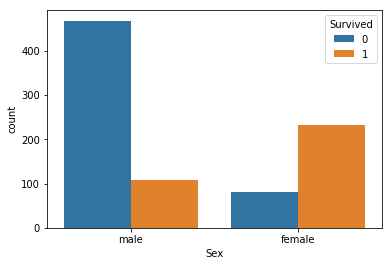

In [6]:
sns.countplot(data=train, x="Sex", hue="Survived")

From the graph it is obvious that women were **more likely survived** the incidents than men.

To see the exact number,

In [7]:
pd.pivot_table(train, index="Sex", values="Survived")

,Survived
Sex,
female,0.742038
male,0.188908


The result shows that the survival rate for women is 74.2% and for men is 18.9%. We can conclude that women 

### Pclass

The next variable is Pclass which represent the ticket class. The hypothesis is that the passengers with higher ticket class would have more likely survived. Let's see if the hypothesis is valid.

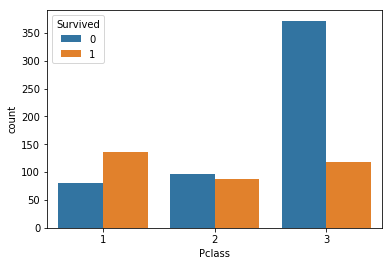

In [8]:
sns.countplot(data=train, x="Pclass", hue="Survived")

From the graph we can see:

  * **More people survived** than perished in the first class.
  * **Slighly more people perished** than survived in the second class.
  * **Considerable number of people perished** than survived in the third class.

In [9]:
pd.pivot_table(train, index="Pclass", values="Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


More than 62.9% of the first class passengers survived, 47.3% for the second class passengers, 24.2% for the third class passengers. Therefore the hypothesis is valid.

### Embarked

Let's see if where they went on-board affects their survivality. 

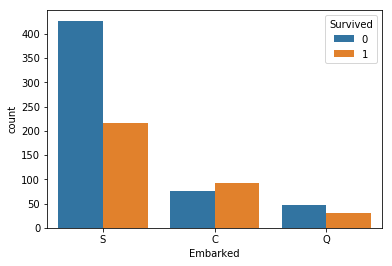

In [10]:
sns.countplot(data=train, x="Embarked", hue="Survived")

In [9]:
pd.pivot_table(train, index="Embarked", values="Survived")

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


#### Survival Rate
Cherbourg, C: 55.4%  
Queenstown, Q: 39%  
Southampton, S: 33.7%  

### Age & Fare

Let's looking at age and fare if there's correlation between them and if it affect the survivality using scatter plot. 

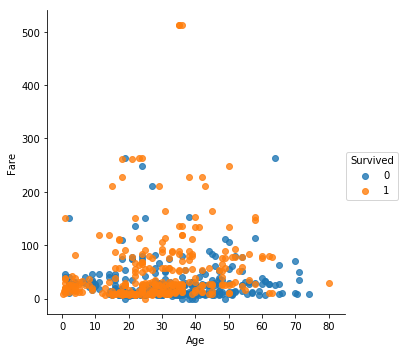

In [10]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

We can see there are outliers who paid the ticket for more than 500 when average ticket price is much lower. I'm going to remove the outliers and look further into the data.

In [11]:
low_fare = train[train["Fare"] < 500]

train.shape, low_fare.shape # we can see 3 people are removed from the datast. 

((891, 11), (888, 11))

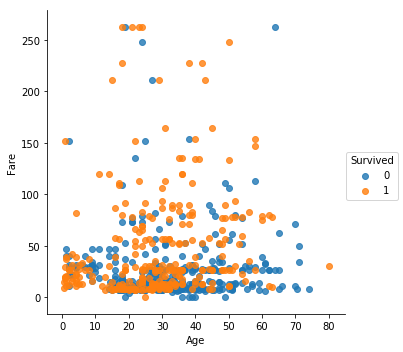

In [12]:
# Rerunning the lmplot. 
sns.lmplot(data=low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

Without outliers, we can see the pattern that the passengers who paid more than 100 dollars are more likely to survived, which is not surprising that it is already the case the higher class ticket they had the more likely they survived. There doesn't seem to have strong correlation between age and fare.

Now to look deeper, I'm going to dive into the passenger who paid less than 100 dollars.

In [12]:
low_low_fare = train[train["Fare"] < 100]

train.shape, low_fare.shape, low_low_fare.shape

((891, 11), (888, 11), (838, 11))

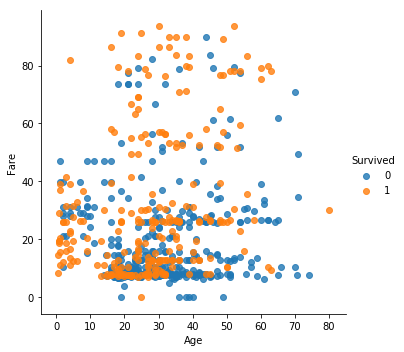

In [13]:
sns.lmplot(data=low_low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

There's a pattern that the passengers who paid less than 20 dollars and under 15 are mostly survived. 

### SibSp, Parch

SibSp is the number of spouses and sibling on board together and Parch the number of parants and children on board together. When looked at them separately, however there might be relationship when they are combined. 

In [14]:
# Create a new column FamilySize.
# It includes him or herself by adding him or herself.
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1

print(train.shape)
train[["SibSp", "Parch", "FamilySize"]].head()

(891, 12)


,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


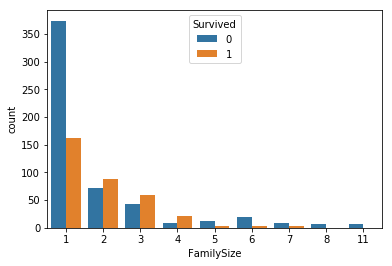

In [15]:
sns.countplot(data=train, x="FamilySize", hue="Survived")

Looking at the result we can conclude that:

  * If you are alone, you unlikely survived.
  * Compare to that, if you have a family with you up to 3, you would more likely have survived.
  * However this trend stops, when there are more than 4 of your family with you. 

I'm going to devide those into 3 groups. ['Single', 'Nuclear', 'Big']

In [16]:
train.loc[train["FamilySize"] == 1, "FamilyType"] = "Single"

train.loc[(train["FamilySize"] > 1) & (train["FamilySize"] < 5), "FamilyType"] = "Nuclear"

train.loc[train["FamilySize"] >= 5, "FamilyType"] = "Big"
print(train.shape)
train[["FamilySize", "FamilyType"]].head(10)

(891, 13)


,FamilySize,FamilyType
PassengerId,,
1,2,Nuclear
2,2,Nuclear
3,1,Single
4,2,Nuclear
5,1,Single
6,1,Single
7,1,Single
8,5,Big
9,3,Nuclear


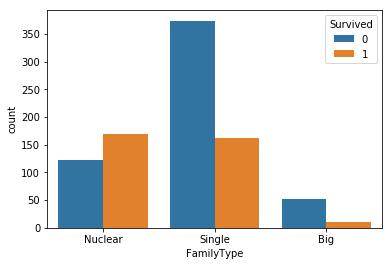

In [17]:
sns.countplot(data=train, x="FamilyType", hue="Survived")

In [18]:
pd.pivot_table(data=train, index="FamilyType", values="Survived")

,Survived
FamilyType,
Big,0.161290
Nuclear,0.578767
Single,0.303538


### Name

Now looking into name columns. Name column might not seem like important. However, if you look closely you notice there's title in the middle of their names. Which means it might affect the survival rate considering it's class based society when the incident happened. 

In [20]:
train["Name"].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [19]:
# Helper function to extract the title
def get_title(name):
    return name.split(", ")[1].split('. ')[0]

train["Name"].apply(get_title).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

Let's visualize four most common title. ['Mr','Miss','Mrs','Master']

In [21]:
train.loc[train["Name"].str.contains("Mr"), "Title"] = "Mr"
train.loc[train["Name"].str.contains("Miss"), "Title"] = "Miss"
train.loc[train["Name"].str.contains("Mrs"), "Title"] = "Mrs"
train.loc[train["Name"].str.contains("Master"), "Title"] = "Master"

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# train 데이터의 상위 10개를 띄우되, Name과 Title 컬럼만 출력합니다.
train[["Name", "Title"]].head(10)

(891, 14)


,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr
6,"Moran, Mr. James",Mr
7,"McCarthy, Mr. Timothy J",Mr
8,"Palsson, Master. Gosta Leonard",Master
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs


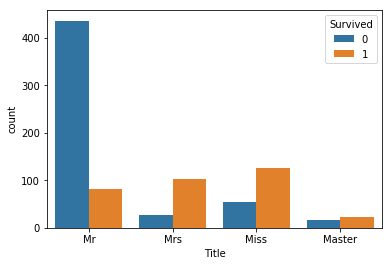

In [22]:
sns.countplot(data=train, x="Title", hue="Survived")

Mr, Mrs, and Miss follow the trend that the female more likely survived than the male. However, when it comes down to Master, which is unmarried male back then, have doesn't follow the trend. 

In [24]:
pd.pivot_table(train, index="Title", values="Survived")

,Survived
Title,
Master,0.575000
Miss,0.700000
Mr,0.158301
Mrs,0.790698


You can see Masters survival rate is 57.5% while Mr.'s 15.8%.

## Preprocessing

Now I need to preprocess the data to fit in the machie learning algorithm. I'm going to use Decision Tree Classification in scikit-learn for this analysis.

In order to do that,

1. The data should be in numeric. So, I will need to encode the character data, such as Sex and Embarked, into numeric data.
1. There should not be null value.


### Encode Sex

There are only two classes, male and female. I'm going to assign 0 for male and 1 for female


In [23]:
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1
print(train.shape)

train[["Sex", "Sex_encode"]].head()

(891, 15)


,Sex,Sex_encode
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


In [24]:
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1
print(test.shape)
test[["Sex", "Sex_encode"]].head()

(418, 11)


,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


### Fill in missing fare

There should not be null value if the column is to be used for the training. 

In [27]:
train[train["Fare"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyType,Title,Sex_encode
PassengerId,,,,,,,,,,,,,,,


In [28]:
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


There is null value ini test data in Fare column. There's only one row that missing the data. It wouldn't be too much of loss even if I fill in 0. 

In [31]:
# Even though there's no null value in Fare in train data, I'm creating Fare_fillin column to match test data set. 
train["Fare_fillin"] = train["Fare"]
print(train.shape)
train[["Fare", "Fare_fillin"]].head()

(891, 16)


,Fare,Fare_fillin
PassengerId,,
1,7.2500,7.2500
2,71.2833,71.2833
3,7.9250,7.9250
4,53.1000,53.1000
5,8.0500,8.0500


In [30]:
test["Fare_fillin"] = test["Fare"]
print(test.shape)
test[["Fare", "Fare_fillin"]].head()

(418, 12)


,Fare,Fare_fillin
PassengerId,,
892,7.8292,7.8292
893,7.0000,7.0000
894,9.6875,9.6875
895,8.6625,8.6625
896,12.2875,12.2875


In [33]:
test.loc[test["Fare"].isnull(), "Fare_fillin"] = 0
test.loc[test["Fare"].isnull(), ["Fare", "Fare_fillin"]]

,Fare,Fare_fillin
PassengerId,,
1044,NaN,0.0


### Encode Embarked

Embarked column also needs to be processed by encoding it. We could encode it like,

  * C == 0
  * S == 1
  * Q == 2
  
However, if this is input in to Decision Tree Algorithm, the algorithm might get confused like the following scenario. 

If S is 1, Q is 2, then 2 * S == Q? or S + S == Q? When the column is just representation of classification, it might interpret as quntitative value. 

To avoid that I'm going to use One Hot Encoding Technique. 

  * C == [1, 0, 0]
  * S == [0, 1, 0]
  * Q == [0, 0, 1]

Now even if the algorithm add or substract, it won't get confused.  

In Python, True == 1, False == 0. So it can be interpreted as the following.

  * C == [True, False, False]
  * S == [False, True, False]
  * Q == [False, False, True]

Pandas offers dummification function and I'm going to use it to create the dummy columns

In [51]:
train = pd.concat([train,pd.get_dummies(train["Embarked"], prefix = 'Embarked', dtype = bool)], axis = 1)

In [52]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyType,Title,Sex_encode,Fare_fillin,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Nuclear,Mr,0.0,7.2500,False,False,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Nuclear,Mrs,1.0,71.2833,True,False,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Single,Miss,1.0,7.9250,False,False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Nuclear,Mrs,1.0,53.1000,False,False,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Single,Mr,0.0,8.0500,False,False,True


In [54]:
train[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False


In [55]:
test = pd.concat([test,pd.get_dummies(test["Embarked"], prefix = 'Embarked', dtype = bool)], axis = 1)
test[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


### Age

From the result before, we know that if you are under 15, your chance to survive goes up. However, when the decision tree make the node, it doesn't always pick up the best range. To help this problem, I'm going to create Child column, which if it's true the passenger is under 15, and if it's false the passenger is over 15. 

In [56]:
train["Child"] = train["Age"] < 15
print(train.shape)

train[["Age", "Child"]].head(10)

(891, 20)


,Age,Child
PassengerId,,
1,22.0,False
2,38.0,False
3,26.0,False
4,35.0,False
5,35.0,False
6,NaN,False
7,54.0,False
8,2.0,True
9,27.0,False


In [57]:
test["Child"] = test["Age"] < 15
print(test.shape)

test[["Age", "Child"]].head(10)

(418, 16)


,Age,Child
PassengerId,,
892,34.5,False
893,47.0,False
894,62.0,False
895,27.0,False
896,22.0,False
897,14.0,True
898,30.0,False
899,26.0,False
900,18.0,False


### FamilySize

Adding FamilySize column for the same reason above. 

In [58]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1

print(train.shape)

train[["SibSp", "Parch", "FamilySize"]].head()

(891, 20)


,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


In [59]:
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
print(test.shape)
test[["SibSp", "Parch", "FamilySize"]].head()

(418, 17)


,SibSp,Parch,FamilySize
PassengerId,,,
892,0,0,1
893,1,0,2
894,0,0,1
895,0,0,1
896,1,1,3


In [60]:
# Single Passenger FamilySize == 1
train["Single"] = train["FamilySize"] == 1

# Nuclear 2 <= FamilySize < 5
train["Nuclear"] = (train["FamilySize"] > 1) & (train["FamilySize"] < 5)

# Big FamilySize >= 5
train["Big"] = train["FamilySize"] >= 5
print(train.shape)

train[["FamilySize", "Single", "Nuclear", "Big"]].head(10)

(891, 23)


,FamilySize,Single,Nuclear,Big
PassengerId,,,,
1,2,False,True,False
2,2,False,True,False
3,1,True,False,False
4,2,False,True,False
5,1,True,False,False
6,1,True,False,False
7,1,True,False,False
8,5,False,False,True
9,3,False,True,False


In [61]:
test["Single"] = test["FamilySize"] == 1
test["Nuclear"] = (test["FamilySize"] > 1) & (test["FamilySize"] < 5)
test["Big"] = test["FamilySize"] >= 5
print(test.shape)

test[["FamilySize", "Single", "Nuclear", "Big"]].head(10)

(418, 20)


,FamilySize,Single,Nuclear,Big
PassengerId,,,,
892,1,True,False,False
893,2,False,True,False
894,1,True,False,False
895,1,True,False,False
896,3,False,True,False
897,1,True,False,False
898,1,True,False,False
899,3,False,True,False
900,1,True,False,False


### Name
Lastly, I found that passengers have Master as their title is different from the tendency that the males didn't likely survived. Therfore, I'm gonna make a column that distinguish them from other groups.

In [62]:
train["Master"] = train["Name"].str.contains("Master")

print(train.shape)
train[["Name", "Master"]].head(10)

(891, 24)


,Name,Master
PassengerId,,
1,"Braund, Mr. Owen Harris",False
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False
3,"Heikkinen, Miss. Laina",False
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False
5,"Allen, Mr. William Henry",False
6,"Moran, Mr. James",False
7,"McCarthy, Mr. Timothy J",False
8,"Palsson, Master. Gosta Leonard",True
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",False


In [63]:
test["Master"] = test["Name"].str.contains("Master")
print(test.shape)

test[["Name", "Master"]].head(10)

(418, 21)


,Name,Master
PassengerId,,
892,"Kelly, Mr. James",False
893,"Wilkes, Mrs. James (Ellen Needs)",False
894,"Myles, Mr. Thomas Francis",False
895,"Wirz, Mr. Albert",False
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",False
897,"Svensson, Mr. Johan Cervin",False
898,"Connolly, Miss. Kate",False
899,"Caldwell, Mr. Albert Francis",False
900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",False


## Train

Now based on the findings and preprocessing I'm going to train the algorithm.

  * **Label**: Survived
  * **Feature**: ["Pclass", "Sex_encode", "Fare_fillin",
                 "Embarked_C", "Embarked_S", "Embarked_Q",
                 "Child", "Single", "Nuclear", "Big", "Master"]

### Creating sets
X_train = training feature table
y_train = training label
X_test  = prediction feature table

In [64]:
feature_names = ["Pclass", "Sex_encode", "Fare_fillin",
                 "Embarked_C", "Embarked_S", "Embarked_Q",
                 "Child", "Single", "Nuclear", "Big", "Master"]
feature_names

['Pclass',
 'Sex_encode',
 'Fare_fillin',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q',
 'Child',
 'Single',
 'Nuclear',
 'Big',
 'Master']

In [65]:
# 생존 여부(Survived)를 label로 지정합니다.
# Survived라는 이름의 컬럼을 label_name 이라는 이름의 변수에 할당합니다.
label_name = "Survived"
label_name

'Survived'

In [66]:
X_train = train[feature_names]

print(X_train.shape)

X_train.head()

(891, 11)


,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q,Child,Single,Nuclear,Big,Master
PassengerId,,,,,,,,,,,
1,3,0.0,7.2500,False,True,False,False,False,True,False,False
2,1,1.0,71.2833,True,False,False,False,False,True,False,False
3,3,1.0,7.9250,False,True,False,False,True,False,False,False
4,1,1.0,53.1000,False,True,False,False,False,True,False,False
5,3,0.0,8.0500,False,True,False,False,True,False,False,False


In [67]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(418, 11)


,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q,Child,Single,Nuclear,Big,Master
PassengerId,,,,,,,,,,,
892,3,0.0,7.8292,False,False,True,False,True,False,False,False
893,3,1.0,7.0000,False,True,False,False,False,True,False,False
894,2,0.0,9.6875,False,False,True,False,True,False,False,False
895,3,0.0,8.6625,False,True,False,False,True,False,False,False
896,3,1.0,12.2875,False,True,False,False,False,True,False,False


In [68]:
y_train = train[label_name]

print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

### Use Decision Tree


In [69]:
# Load DecisionTreeClassifier from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Setting tree depth to 8. It will prevent from the model branch the node depth further than 8. 
model = DecisionTreeClassifier(max_depth=8, random_state=0)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [70]:
# Fitting
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### Visualize

Decision Tree visualization through graphviz module.


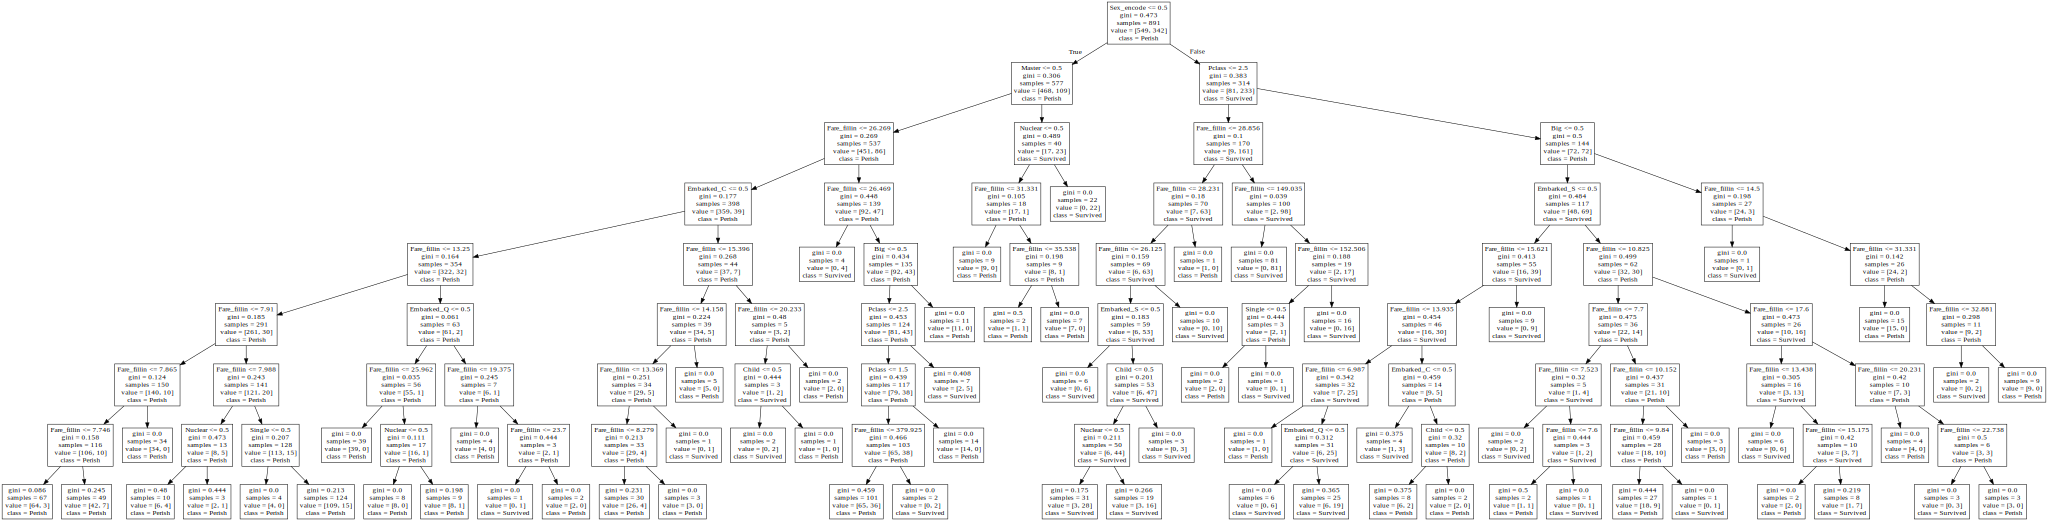

In [71]:
import graphviz

from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model,
                           feature_names=feature_names,
                           class_names=["Perish", "Survived"],
                           out_file=None)

graphviz.Source(dot_tree)

## Predict

Now that training is done, we can predict whether someone survived or not with test set.

In [72]:
predictions = model.predict(X_test)

print(predictions.shape)

predictions[0:10]

(418,)


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

## Submit

Now, create submission file. 

In [73]:
# Reading gender_submission.csv file to use it as a template.
submission = pd.read_csv("data/titanic/gender_submission.csv", index_col="PassengerId")
print(submission.shape)

submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [74]:
submission["Survived"] = predictions

print(submission.shape)

submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [77]:
submission.to_csv("data/titanic/decision-tree.csv")